# IT Academy - Data Science
## S03 T01: Graphic display of a dataset

### _Exercise 1 : Visualize the dataset DelayedFlights.csv graphically._
### _Exercise 2 : Export graphics as images or as html._
### _Exercise 3 : Integrate the graphical visualizations of task 5, Sprint 2._

In [1]:
#import requested library
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import joypy

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir("/Users/giorgiatrupia/Dropbox (Personal)/CODING/Python/DATASETS")

#### Download date set 'Airlines Delay: Airline on-time statistics and delay causes' and upload it to a pandas Dataframe.

In [2]:
#import data on airline flights statistics
df = pd.read_csv('DelayedFlights.csv', sep=',', encoding='utf8', index_col=0, nrows=None)

In [3]:
#data set is very large, show small subset of rows to display (=3)
df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


#### Clean data

In [4]:
#Explore the data it contains, and keep only the columns that you consider relevant.
df.drop(['CRSArrTime', 'CRSElapsedTime','FlightNum','TailNum', 'CRSElapsedTime','TaxiIn', 'TaxiOut','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay' ], axis = 1, inplace=True)

#remove all duplicates
df.drop_duplicates(inplace = True)

##Find missing data per column
df.isnull().sum()

#return a new Data Frame with no empty cells
df = df.dropna()

df.sample(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted
3704053,2008,7,9,3,902.0,845,1108.0,XE,126.0,109.0,14.0,17.0,TUS,SMF,752,0,N,0
47123,2008,1,17,4,1649.0,1615,2036.0,WN,167.0,135.0,46.0,34.0,MDW,TPA,997,0,N,0
2654957,2008,5,8,4,1740.0,1710,1940.0,US,120.0,100.0,32.0,30.0,PHX,OAK,646,0,N,0


#### Map unique carrier code to carrier company name from file carrier.csv

In [5]:
#import the carrier file as a series
carriers = pd.read_csv('carriers.csv', sep=',', encoding='utf8', index_col=0, squeeze=True)

#create new column Carrier companies in dataframe using map() function
df["Carrier"] = df["UniqueCarrier"].map(carriers)
del carriers

# remove superfluous text from carriers label using RegEx module
pattern = r'\(.+\)|\s\-.+'
df["Carrier"] = df["Carrier"].apply(lambda x: re.sub(pattern, '', x))

df.sample(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,Carrier
3940825,2008,7,27,7,1839.0,1750,2047.0,EV,68.0,48.0,42.0,49.0,PFN,MCO,290,0,N,0,Atlantic Southeast Airlines
4167706,2008,7,7,1,2235.0,2120,713.0,B6,338.0,312.0,87.0,75.0,SAN,BOS,2588,0,N,0,JetBlue Airways
6975026,2008,12,26,5,1903.0,1855,2222.0,CO,139.0,117.0,12.0,8.0,IAH,MIA,964,0,N,0,Continental Air Lines Inc.


#### Create one graphic for:
#### 1. A categorical variable (using var Carrier)

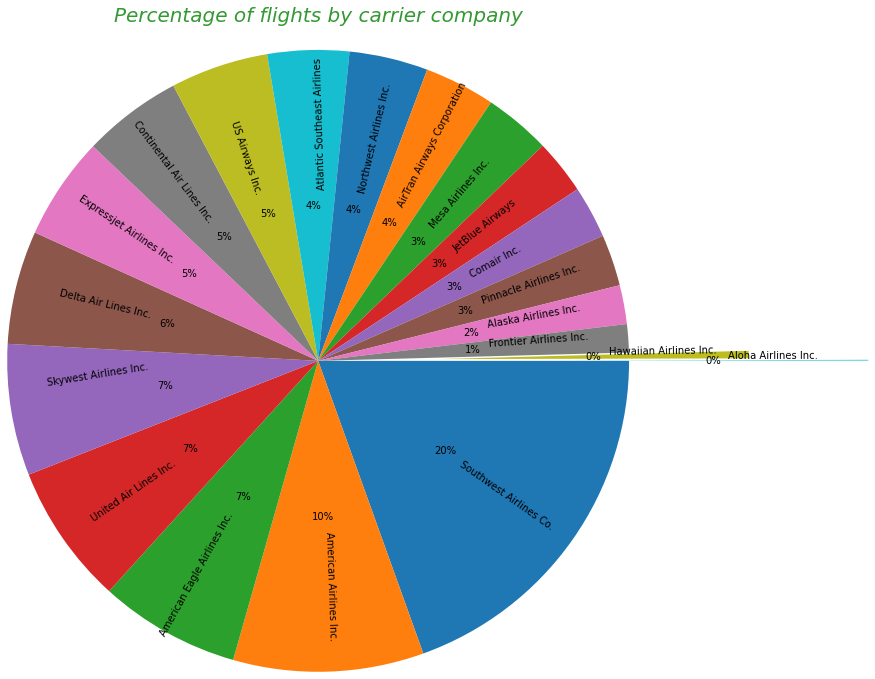

In [6]:
# select data to analyze and index them
data1 = df['Carrier'].value_counts()
dataCarriers = data1.index

#create vector of zeros to use in explode function of pie charts
dataExplode = [0 for element in range(len(data1.index))]
#select which set of data to explode from chart
dataExplode[-2:] = [0.5, 1]

#plot pie chart to show the percentage of flights by carrier company
plt.figure(figsize =(11, 11))
plt.pie(data1.values, explode=dataExplode, labels=dataCarriers, autopct='%1.0f%%',
        pctdistance=.5, labeldistance=.55, radius=1.3, counterclock=False, center=(0.2, 0.2), rotatelabels=True, normalize=True)
plt.title("Percentage of flights by carrier company",
          fontsize=20, fontstyle='italic', color='green', alpha=0.8, pad=40)
plt.savefig('fig1.png')
plt.show()


#### 2. A numerical variable (using var Arrival Delay)

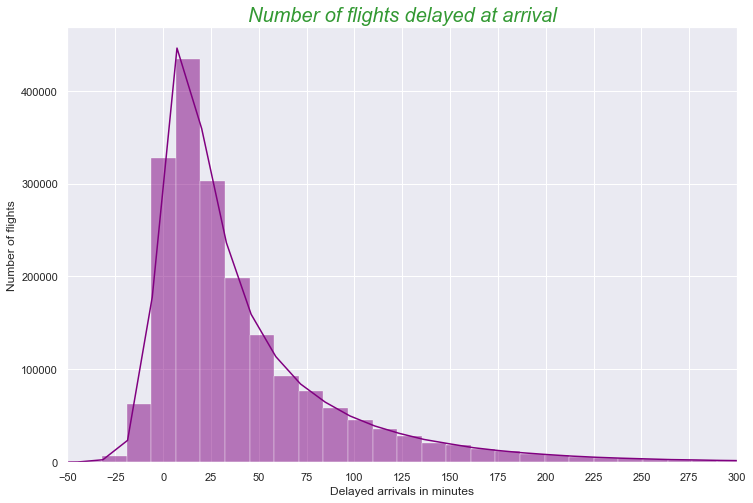

In [7]:
#plot histogram to show the frequency of flights by delay
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize =(12, 8))
sns.histplot(data = df, x="ArrDelay", multiple="stack", bins=200, color="purple",
             kde=True)
ax.set_xlim(-50,300,50)
ax.set_xticks(range(-50,301,25))

plt.title("Number of flights delayed at arrival",
          fontsize=20, fontstyle='italic', color='green', alpha=0.8)
plt.xlabel("Delayed arrivals in minutes")
plt.ylabel("Number of flights")
plt.savefig('fig2.png')
plt.show()

#### 3. A numeric and a categorical variable (using var Carrier and Arrival Delay)

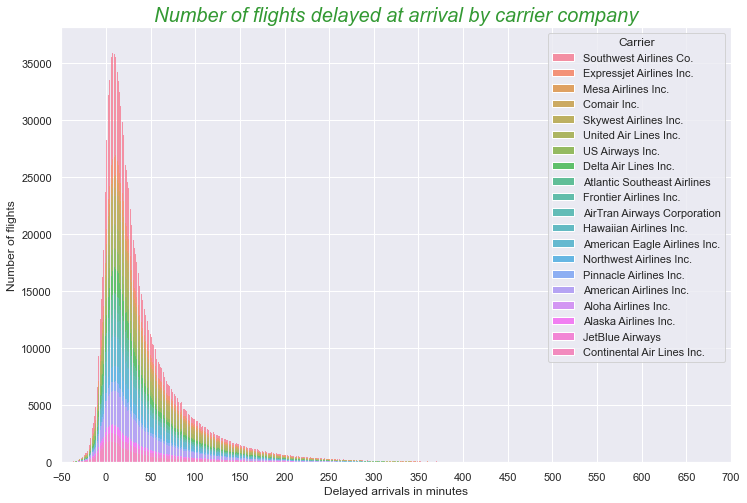

In [8]:
#plot histogram to show the frequency of flights by delay by carrier company
fig, ax = plt.subplots(figsize =(12, 8))
sns.histplot(data = df, x="ArrDelay", hue="Carrier", multiple="stack")
ax.set_xlim(-50,700,50)
ax.set_xticks(range(-50,701,50))

plt.title("Number of flights delayed at arrival by carrier company",
          fontsize=20, fontstyle='italic', color='green', alpha=0.8)
plt.xlabel("Delayed arrivals in minutes")
plt.ylabel("Number of flights")
plt.savefig('fig3.png')
plt.show()

#### 4. Two numerical variables (using var Arrival Delay and Departure Delay)

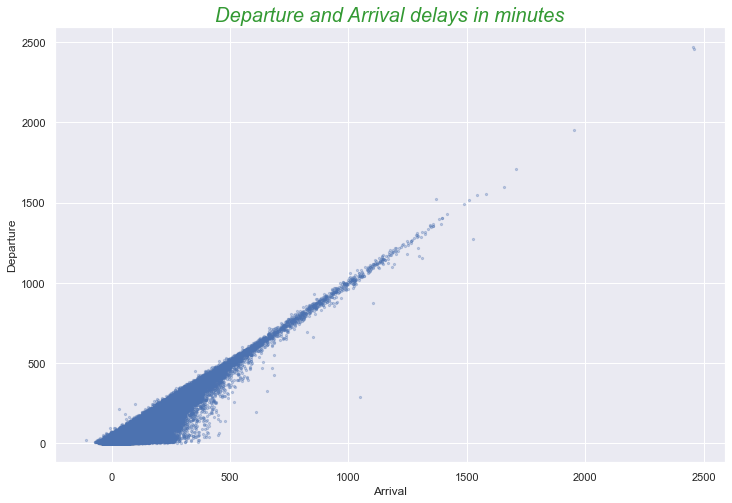

In [9]:
plt.figure(figsize =(12, 8))
plt.scatter(df["ArrDelay"], df["DepDelay"], s=5, c='b', alpha=0.3)
plt.title("Departure and Arrival delays in minutes",
          fontsize=20, fontstyle='italic', color='green', alpha=0.8)
plt.xlabel("Arrival")
plt.ylabel("Departure")
plt.savefig('fig4.png')
plt.show()

#### 5. Three variables (using var Arrival Delay, Departure Delay and Carrier)

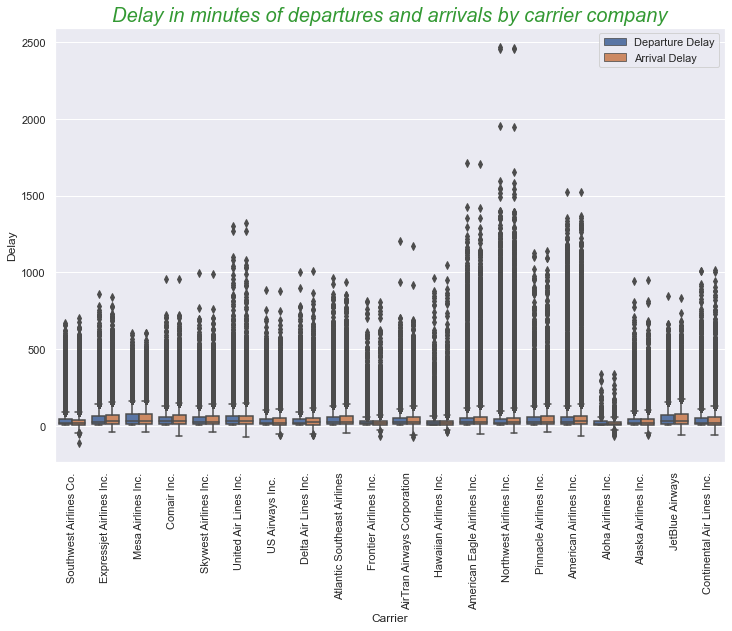

<Figure size 432x288 with 0 Axes>

In [17]:
dataDeparture = df[['Carrier', 'DepDelay']].copy()
dataDeparture.rename(columns={'DepDelay': 'Delay'}, inplace = True)
dataDeparture['T'] = "Departure Delay"
dataArrival = df[['Carrier', 'ArrDelay']].copy()
dataArrival.rename(columns={'ArrDelay': 'Delay'}, inplace = True)
dataArrival['T'] = "Arrival Delay"
data2 = pd.concat([dataDeparture, dataArrival])
del dataDeparture, dataArrival

fig, ax = plt.subplots(figsize =(12, 8))
sns.boxplot(x=data2["Carrier"], y=data2["Delay"], hue=data2["T"])
plt.title("Delay in minutes of departures and arrivals by carrier company", fontsize=20, fontstyle='italic', color='green', alpha=0.8)
plt.xlabel("Carrier")
plt.ylabel("Delay")
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.show()
ax.set_ylim(0,160,20)
plt.savefig('fig5.png')
plt.show()

#### 6. More than three variables (using var Arrival Delay, Departure Delay, Air Time and Carrier)

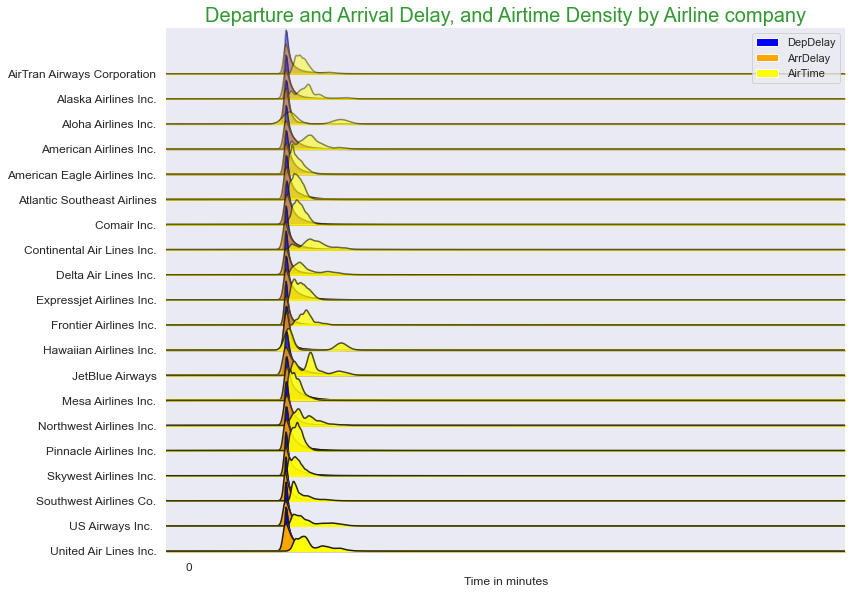

In [16]:
data3 = df[["Carrier", "DepDelay", "ArrDelay", "AirTime"]].copy()

fig, ax = joypy.joyplot(data=data3, column=["DepDelay", "ArrDelay", "AirTime"], by="Carrier", fade=True,
                          ylim='own', xlim=(-100,300), figsize=(12, 8), legend=True, color=['blue', 'orange', 'yellow'], alpha=0.8)
plt.rc("font", size=12)
plt.title("Departure and Arrival Delay, and Airtime Density by Airline company", fontsize=20, color='green', alpha=0.8)
plt.xlabel("Time in minutes",  fontsize=12)
ax[-1].set_xlim(-10,300,20)
plt.savefig('fig6.png')
plt.show()

### Pairwise graphic to summarize task 5 of Sprint 2

<Figure size 1080x864 with 0 Axes>

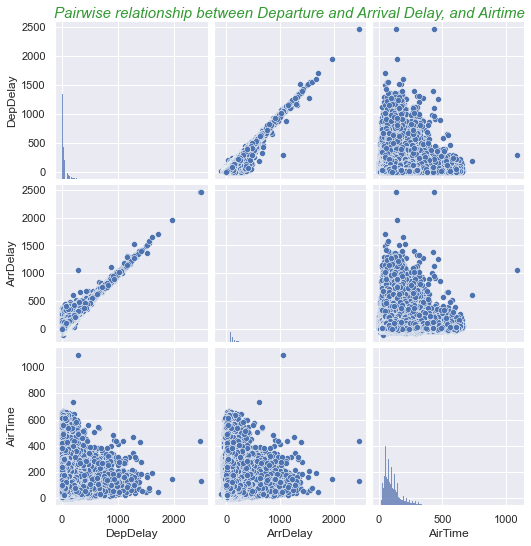

In [18]:
plt.figure(figsize =(15, 12))
axis = sns.pairplot(data3)
plt.title("Pairwise relationship between Departure and Arrival Delay, and Airtime", fontsize=15, fontstyle='italic', color='green', alpha=0.8, loc='right', pad=330)
plt.savefig('fig7.png')
plt.show()